In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statistics
import scipy.stats

# Analysis of Queueing System

In [2]:
df0 = pd.read_csv('MeanCustomersInQueue0.csv', header= None, names = ['Customers 0'])

In [3]:
df0.head()

,Customers 0
0,0.939550
1,0.951477
2,0.954037
3,0.961318
4,0.960556


In [4]:
df1 = pd.read_csv('MeanCustomersInQueue1.csv', header= None, names = ['Customers 1'])

In [5]:
df = df0.join(df1)

In [6]:
df

,Customers 0,Customers 1
0,0.939550,0.961056
1,0.951477,0.944719
2,0.954037,0.959715
3,0.961318,0.935946
4,0.960556,0.943696
...,...,...
95,0.943386,0.965287
96,0.953069,0.964227
97,0.974348,0.949546
98,0.940269,0.972527


In [7]:
df.corr()

,Customers 0,Customers 1
Customers 0,1.000000,-0.206872
Customers 1,-0.206872,1.000000


In [8]:
corr01 = df['Customers 0'].corr(df['Customers 1'])
corr01

-0.20687163161877933

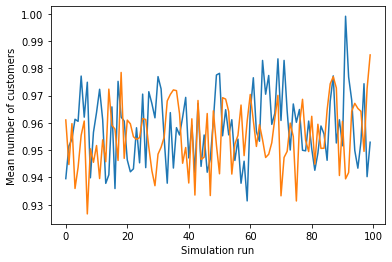

In [91]:
plt.plot(df.index, df['Customers 0'])
plt.plot(df.index, df['Customers 1'])
plt.tight_layout
plt.ylabel('Mean number of customers')
plt.xlabel('Simulation run')
plt.savefig('AntitheticResults.png')

In [10]:
mean0 = df['Customers 0'].mean()
mean1 = df['Customers 1'].mean()

In [36]:
mean0

0.9583899479492117

In [37]:
mean1

0.955355460578347

In [11]:
total = np.append(df['Customers 0'].to_numpy(), df['Customers 1'].to_numpy())

In [34]:
total.std()

0.01237637238364637

In [13]:
sd0 = df['Customers 0'].std()/math.sqrt(len(df['Customers 0']))
sd1 = df['Customers 1'].std()/math.sqrt(len(df['Customers 1']))

In [32]:
df['Customers 0'].var()

0.00016882269646559828

In [14]:
mean = (mean0 + mean1)/2
mean

0.9568727042637794

In [15]:
sd = math.sqrt(1/4 *(sd0**2+sd1**2))
sd

0.0008729161766186534

In [16]:
sd0**2

1.6882269646559827e-06

In [17]:
sd1**2

1.3597036409541294e-06

In [50]:
cov = df.cov()

In [51]:
cov01 = cov.iloc[1,0]

In [47]:
1/4*(sd0**2+sd1**2+2*cov01)

-1.4752728173256336e-05

In [52]:
sd = math.sqrt(1/4*(df['Customers 0'].var()+df['Customers 1'].var()+2*cov01))
sd

0.007779899746451738

In [68]:
sd_mean = sd/math.sqrt(200)
sd_mean

0.0005501219867667525

In [69]:
crit_t = scipy.stats.t.ppf(0.975, 199)
crit_t

1.971956544249395

In [64]:
lb = mean - crit_t*sd_mean

In [65]:
ub = mean + crit_t*sd_mean

In [67]:
print(f'[{lb}, {ub}]')

[0.9557878876118392, 0.9579575209157195]


In [72]:
measurements = pd.read_csv('Measurements.csv', header= None, names = ['Customers'])

In [80]:
frequency = np.unique(measurements['Customers'], return_counts= True)

In [84]:
rel_freq = frequency[1]/sum(frequency[1])

In [85]:
rel_freq

array([4.06896864e-01, 3.51665836e-01, 1.55865788e-01, 5.83564410e-02,
       1.91005380e-02, 5.80776399e-03, 1.67280651e-03, 4.59932999e-04,
       1.31409428e-04, 3.28523571e-05, 7.10321234e-06, 2.66370463e-06])

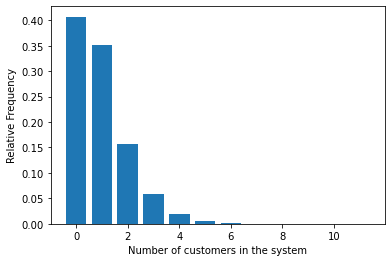

In [88]:
plt.bar(frequency[0], rel_freq)
#plt.xlim([0,30])
#plt.ylim([0,42000])
plt.xlabel('Number of customers in the system')
plt.ylabel('Relative Frequency')
plt.tight_layout
plt.savefig('RelFreq.png')